<a href="https://colab.research.google.com/github/hvakanksha/Python-Projects/blob/main/Analysing_Greenhandle's_Google_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis on Greenhandle's Google Reviews

Making Necessary installations

In [8]:
!pip install -q transformers #Sentiment
!pip install -q plotly-express #Data Visualization

In [5]:
!pip install pyyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import plotly.express as px

In [10]:
greenhandle=pd.read_excel('google.xlsx')
greenhandle.head()

,Customer Username,No. of Reviews,Time of Review,Customer Review,Company Response,Reply Time,Business Reply
0,Karthickeyan S,3 reviews,a month ago,Their contact number will be switched off 99% ...,0,NaN,NaN
1,Smaran Subbaiah,5 reviews,3 weeks ago,Pathetic service.\nCheap quality products and ...,1,2 weeks ago,"Hi Smaran, \nWe raised the reverse pickup and ..."
2,V B PRAKASH,2 reviews,a month ago,Products quality is very good... We have order...,0,NaN,NaN
3,Mohammed Imdad,· 8 reviews,6 months ago,I had ordered 3000 quantity of customized pizz...,0,NaN,NaN
4,Catharine Stelzer,6 reviews,a year ago,I regret ordering from this fraud company. it'...,1,a year ago,"Hi Catharine,\nSorry for the inconvenience cau..."


Using a pretrained model from Huggingface to perform Sentiment Analysis

In [12]:
from transformers import pipeline

sentiment_analysis=pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

In [13]:
print(sentiment_analysis('I love this company!'))

[{'label': 'POSITIVE', 'score': 0.998908519744873}]


In [14]:
greenhandle.dtypes

Customer Username    object
No. of Reviews       object
Time of Review       object
Customer Review      object
Company Response      int64
Reply Time           object
Business Reply       object
dtype: object

In [17]:
greenhandle['Customer Review']=greenhandle['Customer Review'].astype('str')

In [20]:
greenhandle['result']=greenhandle['Customer Review'].apply(lambda x: sentiment_analysis(x))

In [21]:
greenhandle.head()

,Customer Username,No. of Reviews,Time of Review,Customer Review,Company Response,Reply Time,Business Reply,result
0,Karthickeyan S,3 reviews,a month ago,Their contact number will be switched off 99% ...,0,NaN,NaN,"[{'label': 'NEGATIVE', 'score': 0.999502897262..."
1,Smaran Subbaiah,5 reviews,3 weeks ago,Pathetic service.\nCheap quality products and ...,1,2 weeks ago,"Hi Smaran, \nWe raised the reverse pickup and ...","[{'label': 'NEGATIVE', 'score': 0.999502182006..."
2,V B PRAKASH,2 reviews,a month ago,Products quality is very good... We have order...,0,NaN,NaN,"[{'label': 'POSITIVE', 'score': 0.998893320560..."
3,Mohammed Imdad,· 8 reviews,6 months ago,I had ordered 3000 quantity of customized pizz...,0,NaN,NaN,"[{'label': 'NEGATIVE', 'score': 0.999509215354..."
4,Catharine Stelzer,6 reviews,a year ago,I regret ordering from this fraud company. it'...,1,a year ago,"Hi Catharine,\nSorry for the inconvenience cau...","[{'label': 'NEGATIVE', 'score': 0.999506354331..."


In [22]:
greenhandle.shape

(105, 8)

In [23]:
greenhandle['sentiment']=greenhandle['result'].apply(lambda x: (x[0]['label']))
greenhandle['score']=greenhandle['result'].apply(lambda x: (x[0]['score']))

In [24]:
greenhandle.head()

,Customer Username,No. of Reviews,Time of Review,Customer Review,Company Response,Reply Time,Business Reply,result,sentiment,score
0,Karthickeyan S,3 reviews,a month ago,Their contact number will be switched off 99% ...,0,NaN,NaN,"[{'label': 'NEGATIVE', 'score': 0.999502897262...",NEGATIVE,0.999503
1,Smaran Subbaiah,5 reviews,3 weeks ago,Pathetic service.\nCheap quality products and ...,1,2 weeks ago,"Hi Smaran, \nWe raised the reverse pickup and ...","[{'label': 'NEGATIVE', 'score': 0.999502182006...",NEGATIVE,0.999502
2,V B PRAKASH,2 reviews,a month ago,Products quality is very good... We have order...,0,NaN,NaN,"[{'label': 'POSITIVE', 'score': 0.998893320560...",POSITIVE,0.998893
3,Mohammed Imdad,· 8 reviews,6 months ago,I had ordered 3000 quantity of customized pizz...,0,NaN,NaN,"[{'label': 'NEGATIVE', 'score': 0.999509215354...",NEGATIVE,0.999509
4,Catharine Stelzer,6 reviews,a year ago,I regret ordering from this fraud company. it'...,1,a year ago,"Hi Catharine,\nSorry for the inconvenience cau...","[{'label': 'NEGATIVE', 'score': 0.999506354331...",NEGATIVE,0.999506


Mean Score of the predefined model applied

In [26]:
greenhandle['score'].mean()

0.9594639471599034

The model is 95.9% accurate on our data

In [27]:
greenhandle['sentiment'].value_counts()

NEGATIVE    69
POSITIVE    36
Name: sentiment, dtype: int64

There are more negative reviews than positive reviews, let's check the percentage

In [28]:
greenhandle['sentiment'].value_counts(normalize=True)

NEGATIVE    0.657143
POSITIVE    0.342857
Name: sentiment, dtype: float64

In [30]:
fig =px.histogram(greenhandle,x='sentiment',color='sentiment',text_auto=True)
fig.show()

Transformation using NLTK and exploring the data

In [31]:
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math


Dealing with NULL values

In [33]:
greenhandle.isnull().sum()

Customer Username     0
No. of Reviews        8
Time of Review        0
Customer Review       0
Company Response      0
Reply Time           48
Business Reply       48
result                0
sentiment             0
score                 0
dtype: int64

In [34]:
greenhandle.dropna(inplace=True)
greenhandle.isnull().sum()

Customer Username    0
No. of Reviews       0
Time of Review       0
Customer Review      0
Company Response     0
Reply Time           0
Business Reply       0
result               0
sentiment            0
score                0
dtype: int64

Expanding abbreviations to full form

In [35]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [37]:
# Expanding Contractions in the reviews
greenhandle['Customer Review']=greenhandle['Customer Review'].apply(lambda x:expand_contractions(x))

Lowercase the reviews

In [40]:
greenhandle['cleaned']=greenhandle['Customer Review'].apply(lambda x: x.lower())

Remove digits and words containing digits.



 I am doing this because digits and words containing digits do not give much importance to the main words. 

In [42]:
greenhandle['cleaned']=greenhandle['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

Removing Punctuations

In [44]:
greenhandle['cleaned']=greenhandle['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

Removing Extra Spaces

In [46]:
# Removing extra spaces
greenhandle['cleaned']=greenhandle['cleaned'].apply(lambda x: re.sub(' +',' ',x))

Let's see how our data looks

In [48]:
for index,text in enumerate(greenhandle['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 i ordered sample for peices but i would like to partner with you for our products it will be a repeat order is that possible or i have to do it manually please help
Review 2:
 very good quality and quantity value for money love their service i ordered jute bags from them the first time absolutely loved them great collection 
Review 3:
 i had a great experience working as an intern with greenhandle the members are very helpful and cooperative got to learn about many new things
Review 4:
 very nice place to work learning lots of new things over here the concept of greenhandle for providing packaging materials for all kind of industries with ecofriendly product
Review 5:
 beware fraud alert they dont delivery goods

they only asking advance payment


Preprocessing the data for Exploratory Data Analysis

In [49]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning:

Can't initialize NVML



In [51]:
# Lemmatization with stopwords removal
greenhandle['lemmatized']=greenhandle['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

Creating a Document Term Matrix

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(greenhandle['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=[word for word in cv.vocabulary_])
df_dtm.index = greenhandle.index
df_dtm.head(3)


,pathetic,service,cheap,quality,product,unreliable,send,wrong,refuse,resend,...,lo,yeh,koi,baat,hui,diya,tu,krna,chiye,nan
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Exploratory Data Analysis

Wordcloud of commonly used words

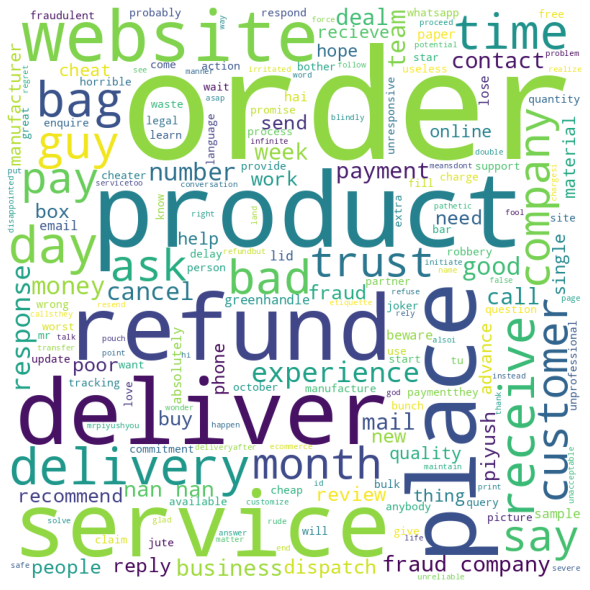

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the reviews together into a single string
text = ' '.join(greenhandle['lemmatized'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the word cloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


Generating a Wordcloud of Negative words

In [67]:
# Import required libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

# Get stopwords from NLTK
stop_words = set(nltk.corpus.stopwords.words('english'))

# Add additional stopwords
stop_words.update(['order', 'place', 'product', 'service', 'deliver', 'website'])

# Define a function to generate wordcloud
def generate_wordcloud(text):
    # Remove punctuations and convert to lowercase
    text = ''.join([word.lower() for word in text if word.isalpha() or word.isspace()])
    # Remove stopwords from the text
    words_without_stopwords = [word for word in text.split() if not word in stop_words]
    # Join the words into a single string
    text_without_stopwords = ' '.join(words_without_stopwords)
    # Create wordcloud
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS).generate(text_without_stopwords)
    # Display the wordcloud
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


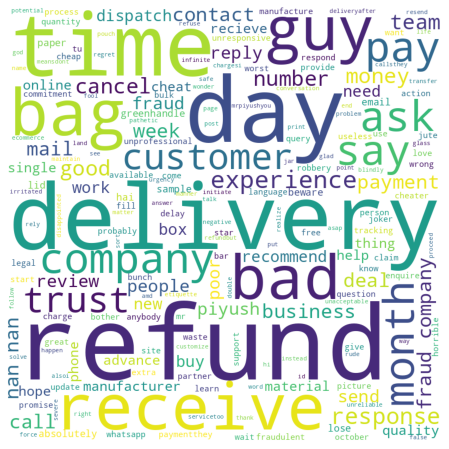

In [68]:
generate_wordcloud(text)

Checking polarity of text i.e. how much is it positive and how much is it negative

In [79]:
from textblob import TextBlob
greenhandle['polarity']=greenhandle['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

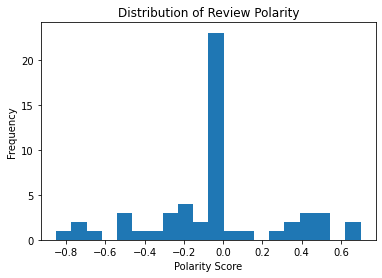

In [81]:
# Create a histogram of the polarity scores
plt.hist(greenhandle['polarity'], bins=20)

# Add title and axis labels
plt.title('Distribution of Review Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()


The x-axis represents the polarity score, and the y-axis represents the frequency of reviews with that polarity score.

In the context of sentiment analysis using TextBlob, a polarity score of 0 indicates that the text is neutral. More specifically, the polarity score ranges from -1 to 1, where -1 indicates a very negative sentiment and 1 indicates a very positive sentiment.

In [87]:
greenhandle.to_excel(r'C:\Users\Rekha\Desktop\New folder\my_dataframe.xlsx', index=False)

Finding out common reasons behind Negative Reviews

In [92]:
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

# Download the stopwords and lemmatizer if necessary
nltk.download('stopwords')
nltk.download('wordnet')

# Create an instance of the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define the preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text.lower())
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the words
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens


# Instantiate the sentiment analysis pipeline
#sentiment_analysis = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")

# Preprocess the reviews
greenhandle['lemmatized'] = greenhandle['Customer Review'].apply(preprocess_text)

# Filter out reviews with only negative sentiment
negative_reviews = []
for review in greenhandle['lemmatized']:
    sentiment = sentiment_analysis(' '.join(review))[0]['label']
    if sentiment == 'NEGATIVE':
        negative_reviews.append(review)

# Identify common reasons for negative reviews
common_reasons = {}
for review in negative_reviews:
    for token in review:
        if token in common_reasons:
            common_reasons[token] += 1
        else:
            common_reasons[token] = 1

# Print the top 10 common reasons for negative reviews
print(sorted(common_reasons.items(), key=lambda x: x[1], reverse=True)[:10])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[('.', 133), ('order', 39), (',', 28), ('product', 14), ('service', 13), ('refund', 13), ('company', 13), ('delivery', 12), ('’', 12), ('never', 11)]


In [93]:
common_reasons_list = sorted(common_reasons.items(), key=lambda x: x[1], reverse=True)[:10]


In [94]:
print(common_reasons_list)

[('.', 133), ('order', 39), (',', 28), ('product', 14), ('service', 13), ('refund', 13), ('company', 13), ('delivery', 12), ('’', 12), ('never', 11)]


Based on the output, the top 10 common reasons for negative reviews are:



1.  Issues with the order
2.  Problems with the product
3. Poor service
4. Refund issues
5. Other Company issues
6. Delivery problems
7. Never receiving the product/service
8. Delayed shipping
9. Poor quality
10. Inaccurate product description






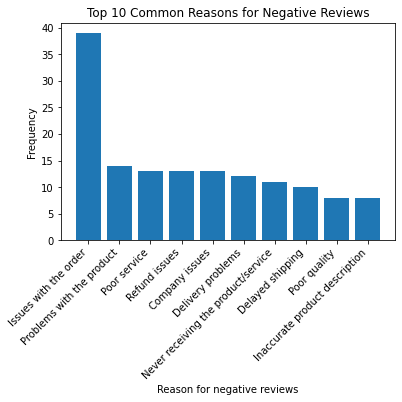

In [100]:
import matplotlib.pyplot as plt

# Define the data
tags = ['Issues with the order', 'Problems with the product', 'Poor service', 'Refund issues', 'Company issues', 'Delivery problems', 'Never receiving the product/service', 'Delayed shipping', 'Poor quality', 'Inaccurate product description']
counts = [39, 14, 13, 13, 13, 12, 11, 10, 8, 8]

# Create the bar graph
plt.bar(tags, counts)

# Add labels and title
plt.xlabel('Reason for negative reviews')
plt.ylabel('Frequency')
plt.title('Top 10 Common Reasons for Negative Reviews')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.show()


Company's responsiveness to addressing Negative Reviews

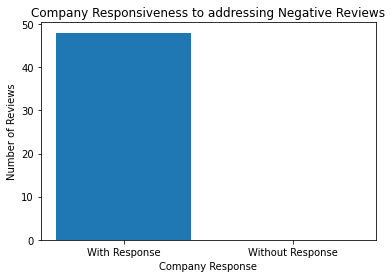

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for negative reviews only
negative_reviews = greenhandle[greenhandle['sentiment'] == 'NEGATIVE']

# Count the number of negative reviews with and without company response
negative_reviews_with_response = negative_reviews[negative_reviews['Company Response'] == 1]
negative_reviews_without_response = negative_reviews[negative_reviews['Company Response'] == 0]

# Plot the data
plt.bar(['With Response', 'Without Response'], [len(negative_reviews_with_response), len(negative_reviews_without_response)])
plt.title('Company Responsiveness to addressing Negative Reviews')
plt.xlabel('Company Response')
plt.ylabel('Number of Reviews')
plt.show()


In [120]:
!pip install ibm_watson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
